### Capture images using Selenium

In [155]:
from selenium import webdriver

CAMERA_TRUONGCHINH_AUCO_STREET = "http://giaothong.hochiminhcity.gov.vn/expandcameraplayer/?camId=56df807bc062921100c143da&camLocation=Tr%C6%B0%E1%BB%9Dng%20Chinh%20-%20%C3%82u%20C%C6%A1&camMode=camera&videoUrl=https://d2zihajmogu5jn.cloudfront.net/bipbop-advanced/bipbop_16x9_variant.m3u8"
def screen_shot():
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    driver = webdriver.Chrome(options = options)

    driver.get(CAMERA_TRUONGCHINH_AUCO_STREET)
    driver.set_window_size(1920, 1080) 
    driver.save_screenshot("cam.png")

screen_shot()

KeyboardInterrupt: 

### Using captured images to count objects


0: 320x640 6 persons, 19 cars, 1 motorcycle, 1 bus, 1 train, 1 traffic light, 228.0ms
Speed: 8.9ms preprocess, 228.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 640)
number of person: 6
number of bicycle: 0
number of car: 19
number of motorcycle: 1
number of bus: 1
number of truck: 0
number of traffic light: 1
number of stop sign: 0


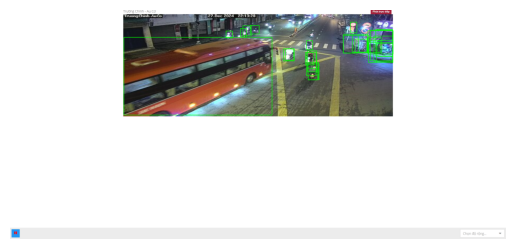

In [151]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

#use yolov8 model
model = YOLO("yolov8n.pt")

#count vehicle
def count_vehicle():
    #set of vehicle count
    vehicle_count = {'person': 0, 'bicycle': 0, 'car': 0, 'motorcycle': 0, 
                     'bus': 0, 'truck': 0, 'traffic light': 0, 'stop sign': 0}
    
    #mapping with each vehicle id
    mapping = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 
                5: 'bus', 7: 'truck', 9: 'traffic light', 11: 'stop sign'}
    
    img = cv2.imread("cam.png")

    results = model(img, conf = 0.05)
    results = results[0]

    #names of each vehicle
    vehicle_names = results.names

    for box in results.boxes:
        class_id = int(box.cls)
        if class_id in mapping:
            vehicle_count[mapping[class_id]] += 1
            
            x1, y1, x2, y2 = map(int, box.xyxy[0]) 
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2) 
        
    for vehicle, cnt in vehicle_count.items():
        print(f"number of {vehicle}: {cnt}")

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

count_vehicle()
